#Carga del dataset e .info()

In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

#cargamos el dataset correcto (train.csv)
dataset = pd.read_csv('dataset/train.csv')
dataset.target = dataset.target.astype('bool')

# seteamos el id como index
dataset = dataset.set_index('id')

#Asignamos la longitud del tweet a una nueva columna
dataset['longitud'] = dataset.text.str.len()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 61.1MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 64.1MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 23.2MB/s]


#Info agregada por Germán

##Análisis de tweets repetidos

In [0]:
#Cantidad de tweets repetidos
grupo = dataset[dataset.duplicated()]

grupo['cantidad'] = 1

grupo = grupo.groupby(['keyword', 'location', 'text', 'target', 'longitud']).agg({'cantidad':['sum']})
grupo.columns = ['repeticiones']

grupo = grupo.reset_index()

grupo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


keyword                  location  ... longitud  repeticiones
0           ablaze            Live On Webcam  ...      114             1
1       aftershock               Switzerland  ...      138             1
2       aftershock                        US  ...      138             1
3       derailment                     India  ...       63             1
4         detonate             Morioh, Japan  ...       99             2
5         detonate             Morioh, Japan  ...      101             2
6        displaced  Pedophile hunting ground  ...      136             1
7        displaced  Pedophile hunting ground  ...      134             2
8    mass%20murder                 Anonymous  ...      134             1
9           rescue          Toronto, Ontario  ...       75             1
10  suicide%20bomb                   Nigeria  ...      140             5
11       terrorist               MAD as Hell  ...      133             1

[12 rows x 6 columns]

##Análisis de tweets por su veracidad y ubicación

Text(0.5, 1.0, 'Cantidad de tweets verídicos según ubicación')

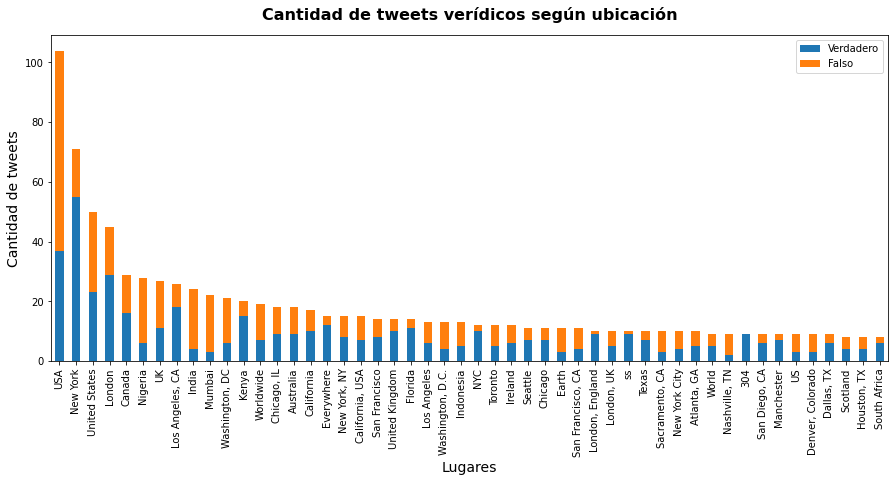

In [0]:
#tweets y su veracidad por ubicación

grupo = dataset.groupby(['location', 'target']).agg({'target': 'count'})
grupo.columns = ['Cantidad']
grupo = grupo.reset_index()
grupo = grupo.pivot_table(index = 'location', columns = 'target', values = 'Cantidad', fill_value = 0)
grupo.columns = ['Verdadero', 'Falso']
grupo['Total'] = grupo.Verdadero + grupo.Falso
grupo = grupo.sort_values(by = 'Total', ascending=False)
grupo = grupo.drop(columns = ['Total']).head(50)


fig, ax = plt.subplots(figsize=(15,6))
grupo.plot.bar(ax = ax, stacked = True)
ax.set_ylabel('Cantidad de tweets',fontsize=14)
plt.xlabel("Lugares",fontsize=14)
ax.set_title('Cantidad de tweets verídicos según ubicación',fontsize=16,fontweight='bold', pad = 15)


##Análisis de tweets por su veracidad y longitud

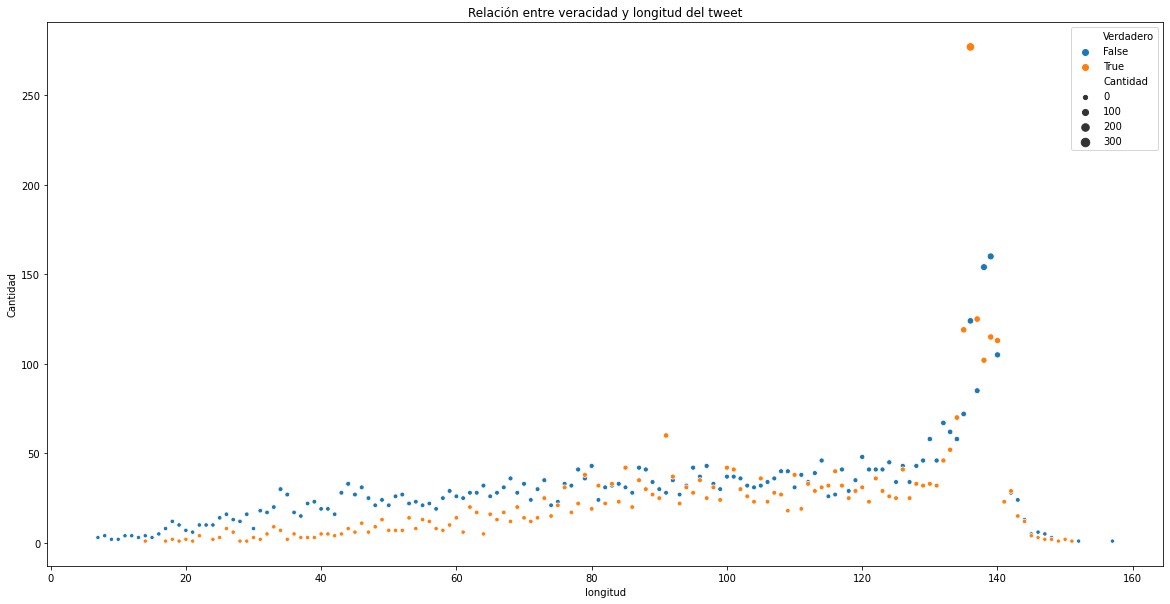

In [0]:
#Tweets por longitud y veracidad
grupo = dataset.groupby(['longitud', 'target']).agg({'target':['count']})
grupo.columns = ['Cantidad']

grupo = grupo.reset_index()
grupo = grupo.rename(columns={'target':'Verdadero'})

ax = sns.scatterplot(x = 'longitud', y = 'Cantidad', data = grupo, hue = 'Verdadero', size = 'Cantidad')
ax.set_title('Relación entre veracidad y longitud del tweet')
fig = ax.get_figure()
fig.savefig('figure.png')


# Info agregada por Cele

## Análisis de la estructura y tipos de datos. Valores nulos

In [0]:
dataset.head(5)

keyword location  ... target  longitud
id                   ...                 
1      NaN      NaN  ...   True        69
4      NaN      NaN  ...   True        38
5      NaN      NaN  ...   True       133
6      NaN      NaN  ...   True        65
7      NaN      NaN  ...   True        88

[5 rows x 5 columns]

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 1 to 10873
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   bool  
 4   longitud  7613 non-null   int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 304.8+ KB


In [0]:
#estadisticas de la longitud de los tweets
dataset.longitud.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: longitud, dtype: float64

In [0]:
# Creo dos df con los tweets verdaderos y falsos respectivamente
# de tratarse de un DF más grande debería utilizar otra estrategia
# como por ejemplo hacer un groupby por la columna target
tweet_len_true = dataset.loc[(dataset['target']),'longitud']
tweet_len_false = dataset.loc[(dataset['target']==False),'longitud']

tweet_len_true

id
1         69
4         38
5        133
6         65
7         88
        ... 
10869     83
10870    125
10871     65
10872    137
10873     94
Name: longitud, Length: 3271, dtype: int64

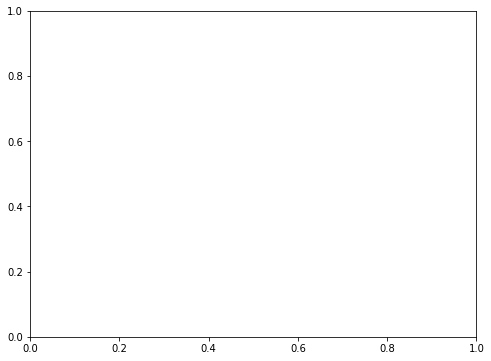

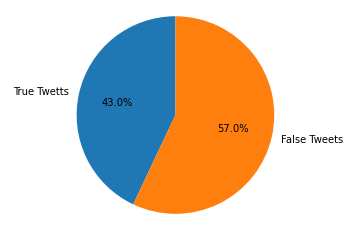

In [0]:

tweet_totals = dataset['longitud'].count()
tweet_true_count = tweet_len_true.count()
tweet_false_count = tweet_len_false.count()

fig, ax = plt.subplots(figsize=(8,6))

labels = 'True Twetts', 'False Tweets'
sizes = [tweet_true_count, tweet_false_count]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

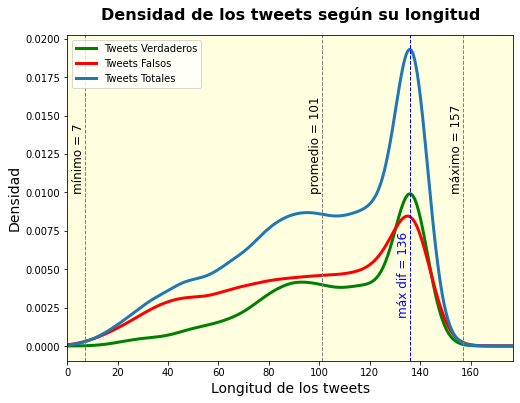

In [0]:
from scipy.stats import gaussian_kde

kernel_true = gaussian_kde(tweet_len_true)
kernel_false = gaussian_kde(tweet_len_false)
x_lim = dataset['longitud'].max()+20
X = np.linspace(0,x_lim,200)
Y_true = kernel_true.evaluate(X)*tweet_true_count/tweet_totals
Y_false = kernel_false.evaluate(X)*tweet_false_count/tweet_totals

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y_true , label='Tweets Verdaderos', color = 'green', linewidth=3)
ax.plot(X, Y_false , label='Tweets Falsos', color = 'red', linewidth=3)
dataset['longitud'].plot(kind='kde', ax=ax, label='Tweets Totales', linewidth=3, xlim=(0, x_lim))

plt.xlabel('Longitud de los tweets',fontsize=14)
plt.ylabel('Densidad',fontsize=14)
plt.title('Densidad de los tweets según su longitud',fontsize=16,fontweight='bold', pad = 15)
ax.set_facecolor('lightyellow')

# calculo las estadísticas pedidas sobre el total de los tweets
min_len = dataset['longitud'].min()
mean_len = dataset['longitud'].mean()
max_len = dataset['longitud'].max()

# calculo el punto donde hay mayor diferencia entre los 
# tweets verdaderos y los falsos
max_diff = (tweet_len_true.value_counts()-tweet_len_false.value_counts()).dropna().abs().idxmax()

ax.axvline(mean_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(min_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(max_len, color='grey', linestyle='--', linewidth=1)
ax.axvline(max_diff, color='blue', linestyle='--', linewidth=1)

plt.text(min_len - 5 , ax.get_ylim()[1]/2, 'mínimo = %d' %min_len, rotation = 90, fontsize = 12)
plt.text(mean_len - 5 , ax.get_ylim()[1]/2, 'promedio = %d' %mean_len, rotation = 90, fontsize = 12)
plt.text(max_len - 5 , ax.get_ylim()[1]/2, 'máximo = %d' %max_len, rotation = 90, fontsize = 12)

plt.text(max_diff- 5 , ax.get_ylim()[1]/10, 'máx dif = %d' %max_diff, rotation = 90, fontsize = 12, color = 'blue')

plt.legend()

## Análisis de los hashtags

In [0]:
# extrae los hashtags de un texto y devuelve una lista 
def hashtags(text):
    result = []
    for token in text.split():
        if token[0]=='#':
            result.append(token.replace('#', '').lower())
    return result    

text = 'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
hashtags(text)

['earthquake']

In [0]:
dataset['hashtags'] = dataset.text.apply(lambda x : hashtags(x))
dataset.head(5)

keyword location  ... longitud             hashtags
id                   ...                              
1      NaN      NaN  ...       69         [earthquake]
4      NaN      NaN  ...       38                   []
5      NaN      NaN  ...      133                   []
6      NaN      NaN  ...       65          [wildfires]
7      NaN      NaN  ...       88  [alaska, wildfires]

[5 rows x 6 columns]

In [0]:
df_hashtags = dataset.explode('hashtags')
df_hashtags.head(20)

keyword location  ... longitud    hashtags
id                   ...                     
1      NaN      NaN  ...       69  earthquake
4      NaN      NaN  ...       38         NaN
5      NaN      NaN  ...      133         NaN
6      NaN      NaN  ...       65   wildfires
7      NaN      NaN  ...       88      alaska
7      NaN      NaN  ...       88   wildfires
8      NaN      NaN  ...      110   rockyfire
8      NaN      NaN  ...      110      cafire
8      NaN      NaN  ...      110   wildfires
10     NaN      NaN  ...       95       flood
10     NaN      NaN  ...       95    disaster
13     NaN      NaN  ...       59         NaN
14     NaN      NaN  ...       79         NaN
15     NaN      NaN  ...       52         NaN
16     NaN      NaN  ...       43         NaN
17     NaN      NaN  ...      129    flooding
18     NaN      NaN  ...       76     raining
18     NaN      NaN  ...       76    flooding
18     NaN      NaN  ...       76     florida
18     NaN      NaN  ...       76    tampabay

[20 rows x 6 columns]

In [0]:
# hay que ver si vale la pena porque hay muy pocos hashtags en comparacion al tamaño del dataset
df_hashtags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9219 entries, 1 to 10873
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   9138 non-null   object
 1   location  6080 non-null   object
 2   text      9219 non-null   object
 3   target    9219 non-null   bool  
 4   longitud  9219 non-null   int64 
 5   hashtags  3340 non-null   object
dtypes: bool(1), int64(1), object(4)
memory usage: 441.1+ KB


In [0]:
top_hashtags_series = df_hashtags.hashtags.value_counts().nlargest(50)
top_hashtags = pd.DataFrame(top_hashtags_series).reset_index()
top_hashtags.columns = ['hashtags','Cantidad']
top_hashtags.head()


hashtags  Cantidad
0      news        72
1       hot        30
2  prebreak        30
3      best        30
4       ???        23

In [0]:
top_hashtags.Cantidad.sum()

633

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


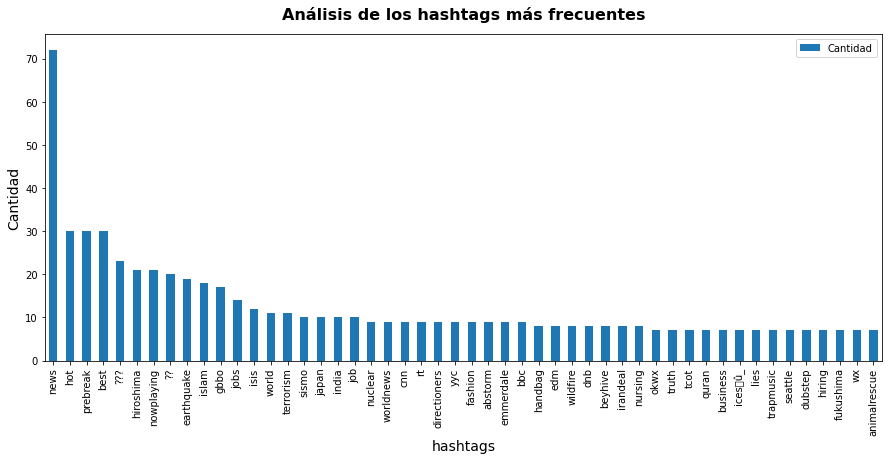

In [0]:

fig, ax = plt.subplots(figsize=(15,6))


plt.xlabel("Hashtags",fontsize=14)
plt.ylabel('Cantidad',fontsize=14)
plt.title('Análisis de los hashtags más frecuentes',fontsize=16,fontweight='bold', pad = 15)

top_hashtags.plot.bar(x='hashtags',y='Cantidad', ax = ax)

plt.show()

## Análisis por ubicacion

In [0]:
dataset.location.value_counts()

USA                          104
New York                      71
United States                 50
London                        45
Canada                        29
                            ... 
Albuquerque                    1
MI                             1
Terlingua, Texas               1
My heart is a ghost town!      1
Raleigh Durham, NC             1
Name: location, Length: 3341, dtype: int64

In [0]:
dataset.location.isnull().value_counts()

False    5080
True     2533
Name: location, dtype: int64

In [0]:
top_locations = dataset.location.value_counts().reset_index()
top_locations.columns = ['Ubicacion', 'Cantidad']
top_locations.head()

Ubicacion  Cantidad
0            USA       104
1       New York        71
2  United States        50
3         London        45
4         Canada        29

In [0]:
top_locations.describe()
# hay muchas ciudades con un solo elemento, como que la "cola" tiene mucho peso

Cantidad
count  3341.000000
mean      1.520503
std       3.022364
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max     104.000000

In [0]:
# cantidad de ubicaciones con un solo elemento (son muchas!! 2818 / 3341)
top_locations.loc[top_locations['Cantidad']< 2].count()

Ubicacion    2818
Cantidad     2818
dtype: int64

Text(0.5, 1.0, 'Análisis de las ubicaciones más frecuentes')

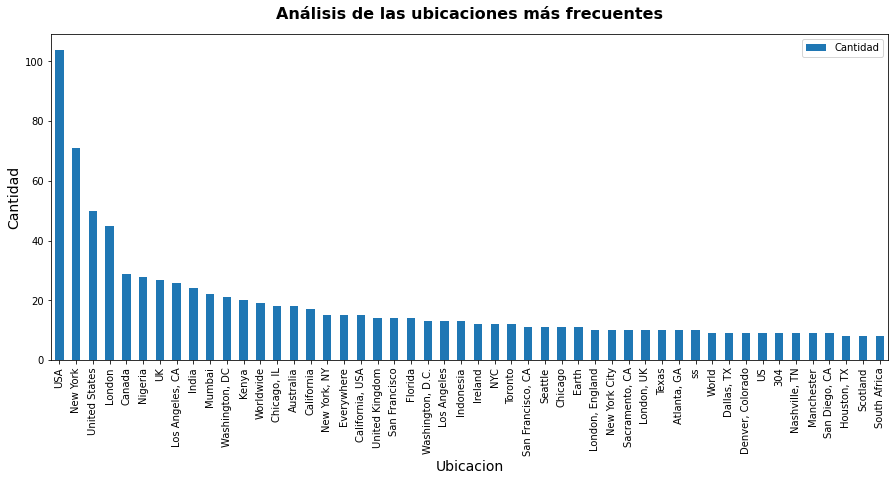

In [0]:
fig, ax = plt.subplots(figsize=(15,6))

top_locations.nlargest(50, 'Cantidad').plot(kind='bar', x = 'Ubicacion', ax = ax)

plt.xlabel("Ubicacion",fontsize=14)
plt.ylabel('Cantidad',fontsize=14)
plt.title('Análisis de las ubicaciones más frecuentes',fontsize=16,fontweight='bold', pad = 15)




## Análisis por keywords

In [0]:
dataset.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
body%20bags              41
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [0]:
dataset.keyword.isnull().value_counts()

False    7552
True       61
Name: keyword, dtype: int64

In [0]:
top_keywords = dataset.keyword.value_counts().reset_index()
top_keywords.columns = ['Keywords', 'Cantidad']

top_keywords.head(5)

Keywords  Cantidad
0   fatalities        45
1       deluge        42
2   armageddon        42
3  body%20bags        41
4      sinking        41

In [0]:
top_keywords.describe()
# estan distribuidas bastante uniformemente

Cantidad
count  221.000000
mean    34.171946
std      4.786091
min      9.000000
25%     33.000000
50%     35.000000
75%     37.000000
max     45.000000

Text(0.5, 1.0, 'Análisis de las keywords más frecuentes')

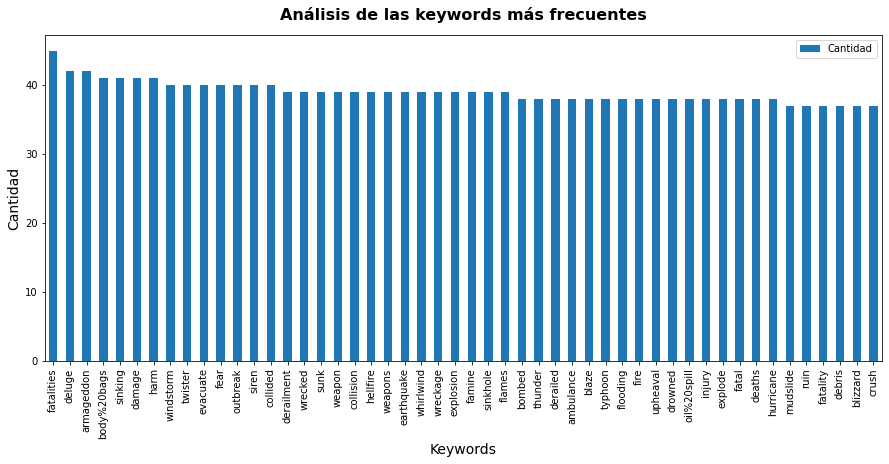

In [0]:
fig, ax = plt.subplots(figsize=(15,6))

top_keywords.nlargest(50,'Cantidad').plot(kind='bar', x = 'Keywords', ax = ax)

plt.xlabel("Keywords",fontsize=14)
plt.ylabel('Cantidad',fontsize=14)
plt.title('Análisis de las keywords más frecuentes',fontsize=16,fontweight='bold', pad = 15)


#agrego texto para probar cambios 

# TEXTO 2 PARA VER HISTORIAL 

# ahora esto lo agrego con mi usuario 


# Info agregada por ...

In [0]:
# Pongan toda la info en celdas como estas